<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_3_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.150398,34.126947,63.971422,-0.000215,169.248552,169.250123,-0.001571
1,0.0,1.0,70.593977,54.505794,23.772992,-0.001204,158.871558,158.872085,-0.000527
2,0.0,2.0,31.303182,30.178272,35.858769,-0.006995,107.333229,107.341735,-0.008507
3,0.0,3.0,21.768708,73.913483,46.033813,-0.000176,151.715829,151.716358,-0.000530
4,0.0,4.0,45.304602,71.442391,94.033085,0.000524,220.780602,220.781183,-0.000581
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,69.872726,75.933414,24.450954,-0.000079,180.257015,180.257384,-0.000369
59996,999.0,56.0,44.394426,82.181525,94.196274,0.000754,230.772979,230.771851,0.001128
59997,999.0,57.0,94.355252,39.297888,99.024609,-0.004937,242.672812,242.677091,-0.004279
59998,999.0,58.0,74.332324,42.911546,75.088792,0.002068,202.334730,202.332356,0.002374


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    61.150398  34.126947  63.971422  ...  169.248552  169.250123 -0.001571
      1.0    70.593977  54.505794  23.772992  ...  158.871558  158.872085 -0.000527
      2.0    31.303182  30.178272  35.858769  ...  107.333229  107.341735 -0.008507
      3.0    21.768708  73.913483  46.033813  ...  151.715829  151.716358 -0.000530
      4.0    45.304602  71.442391  94.033085  ...  220.780602  220.781183 -0.000581
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   69.872726  75.933414  24.450954  ...  180.257015  180.257384 -0.000369
      56.0   44.394426  82.181525  94.196274  ...  230.772979  230.771851  0.001128
      57.0   94.355252  39.297888  99.024609  ...  242.672812  242.677091 -0.004279
      58.0   74.332324  42.911546  75.088792  ...  202.334730  202.332356  0.002374
      59.0   40.507090  21.825398  28.949888  ...  101.276338  101.282714 -0.006376

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    61.150398  34.126947  63.971422  ...  169.248552  169.250123 -0.001571
      1.0    70.593977  54.505794  23.772992  ...  158.871558  158.872085 -0.000527
      2.0    31.303182  30.178272  35.858769  ...  107.333229  107.341735 -0.008507
      3.0    21.768708  73.913483  46.033813  ...  151.715829  151.716358 -0.000530
      4.0    45.304602  71.442391  94.033085  ...  220.780602  220.781183 -0.000581
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   69.872726  75.933414  24.450954  ...  180.257015  180.257384 -0.000369
      56.0   44.394426  82.181525  94.196274  ...  230.772979  230.771851  0.001128
      57.0   94.355252  39.297888  99.024609  ...  242.672812  242.677091 -0.004279
      58.0   74.332324  42.911546  75.088792  ...  202.334730  202.332356  0.002374
      59.0   40.507090  21.825398  28.949888  ...  101.276338  101.282714 -0.006376

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.150398,34.126947,63.971422,-0.000215,169.248552,169.250123,-0.001571
1,0.0,1.0,70.593977,54.505794,23.772992,-0.001204,158.871558,158.872085,-0.000527
2,0.0,2.0,31.303182,30.178272,35.858769,-0.006995,107.333229,107.341735,-0.008507
3,0.0,3.0,21.768708,73.913483,46.033813,-0.000176,151.715829,151.716358,-0.000530
4,0.0,4.0,45.304602,71.442391,94.033085,0.000524,220.780602,220.781183,-0.000581
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,69.872726,75.933414,24.450954,-0.000079,180.257015,180.257384,-0.000369
59996,999.0,56.0,44.394426,82.181525,94.196274,0.000754,230.772979,230.771851,0.001128
59997,999.0,57.0,94.355252,39.297888,99.024609,-0.004937,242.672812,242.677091,-0.004279
59998,999.0,58.0,74.332324,42.911546,75.088792,0.002068,202.334730,202.332356,0.002374


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    61.150398  34.126947  63.971422  ...  169.248552  169.250123 -0.001571
      1.0    70.593977  54.505794  23.772992  ...  158.871558  158.872085 -0.000527
      2.0    31.303182  30.178272  35.858769  ...  107.333229  107.341735 -0.008507
      3.0    21.768708  73.913483  46.033813  ...  151.715829  151.716358 -0.000530
      4.0    45.304602  71.442391  94.033085  ...  220.780602  220.781183 -0.000581
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   69.872726  75.933414  24.450954  ...  180.257015  180.257384 -0.000369
      56.0   44.394426  82.181525  94.196274  ...  230.772979  230.771851  0.001128
      57.0   94.355252  39.297888  99.024609  ...  242.672812  242.677091 -0.004279
      58.0   74.332324  42.911546  75.088792  ...  202.334730  202.332356  0.002374
      59.0   40.507090  21.825398  28.949888  ...  101.276338  101.282714 -0.006376

[60000 rows x 7 columns]

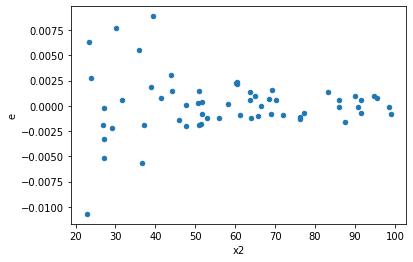

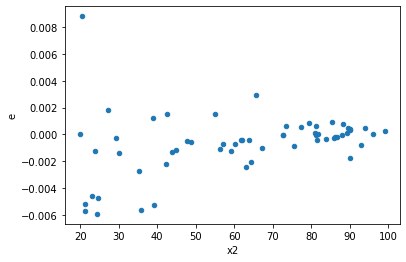

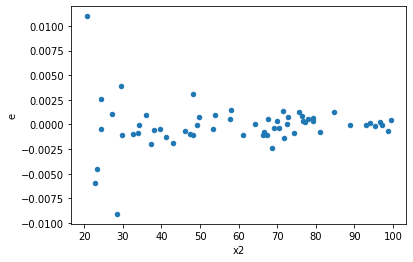

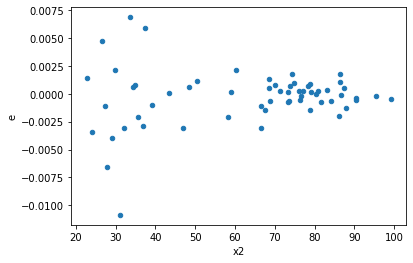

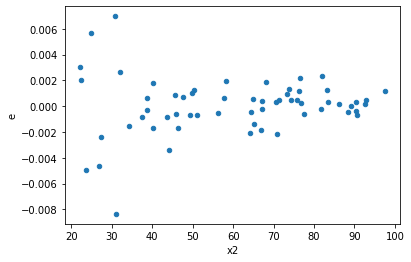

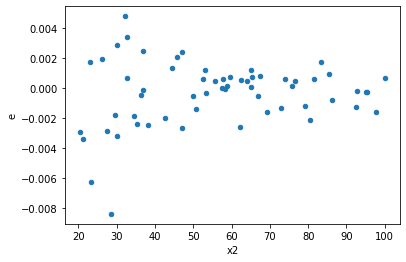

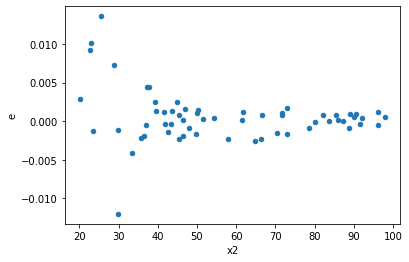

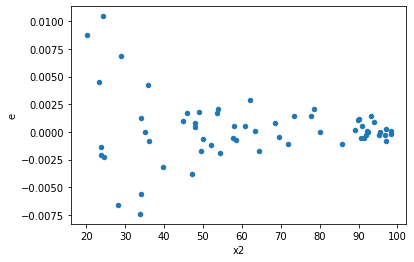

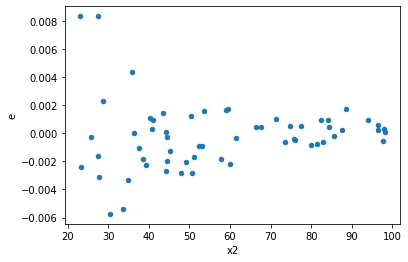

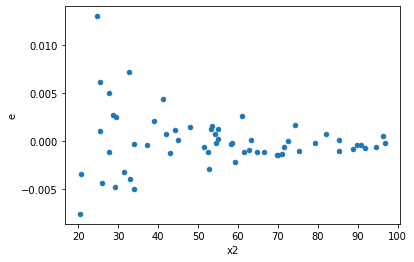

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,25.0,29.0,2.302851986857043e-05,0.00033727412784982847,9.211407947428172e-07,1.1630142339649257e-05,12.625803141089193,1.7775234617545266e-09,0.9999999991112383,8.887617308772633e-10,Reject005=0 : Heteroscedasticity
3.0,33.0,21.0,0.0001523755867115735,0.00032693376904361173,4.617442021562834e-06,1.5568274716362462e-05,3.371623215551102,0.0048051360085963335,0.9975974319957018,0.0024025680042981667,Reject005=0 : Heteroscedasticity
5.0,26.0,28.0,9.62240001588263e-05,0.00030129188531924746,3.7009230830317807e-06,1.076042447568741e-05,2.9074974632740855,0.006804621836732805,0.9965976890816336,0.0034023109183664024,Reject005=0 : Heteroscedasticity
6.0,23.0,31.0,2.7295520656316298e-05,0.00016814047993039485,1.186761767665926e-06,5.423886449367576e-06,4.57032455640617,0.00011616182536267061,0.9999419190873187,5.8080912681335306e-05,Reject005=0 : Heteroscedasticity
9.0,22.0,32.0,6.255297375089918e-05,0.00016263098316002982,2.843316988677235e-06,5.082218223750932e-06,1.787425828351019,0.13115417380509564,0.9344229130974522,0.06557708690254782,Reject005=1 : Homoscedasticity
11.0,35.0,19.0,2.8673827869157855e-05,0.00020415289150038125,8.192522248330815e-07,1.0744889026335856e-05,13.115483486816375,2.244845327403766e-07,0.9999998877577336,1.122422663701883e-07,Reject005=0 : Heteroscedasticity
15.0,26.0,28.0,0.00010736727082769368,0.00015343950078575957,4.129510416449756e-06,5.479982170919985e-06,1.3270295067160196,0.46375641522017585,0.7681217923899121,0.23187820761008793,Reject005=1 : Homoscedasticity
16.0,20.0,34.0,1.8765669461540952e-05,0.0005918053726771291,9.382834730770477e-07,1.740604037285674e-05,18.550939958235237,1.518341008477364e-12,0.9999999999992408,7.59170504238682e-13,Reject005=0 : Heteroscedasticity
17.0,26.0,28.0,1.8880957798692824e-05,0.0003207940497029385,7.261906845651086e-07,1.1456930346533517e-05,15.776752015752846,1.7491585957429834e-10,0.9999999999125421,8.745792978714917e-11,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,29.0,25.0,0.00043116967744191617,1.3689445018057678e-05,1.4867919911790213e-05,5.475778007223071e-07,0.03682948280398522,8.542920273121172e-14,Reject005=0 : Heteroscedasticity
1.0,26.0,28.0,0.0001290040380755235,0.00013003207445395275,4.9616937721355195e-06,4.644002659069741e-06,0.935971237312164,0.8686690625187661,Reject005=1 : Homoscedasticity
2.0,25.0,29.0,2.302851986857043e-05,0.00033727412784982847,9.211407947428172e-07,1.1630142339649257e-05,12.625803141089193,1.7775234617545266e-09,Reject005=0 : Heteroscedasticity
3.0,33.0,21.0,0.0001523755867115735,0.00032693376904361173,4.617442021562834e-06,1.5568274716362462e-05,3.371623215551102,0.0048051360085963335,Reject005=0 : Heteroscedasticity
4.0,22.0,32.0,0.00023766105708218562,5.7936405825341975e-05,1.0802775321917529e-05,1.8105126820419367e-06,0.16759699503965658,5.0173271821280656e-05,Reject005=0 : Heteroscedasticity
5.0,26.0,28.0,9.62240001588263e-05,0.00030129188531924746,3.7009230830317807e-06,1.076042447568741e-05,2.9074974632740855,0.006804621836732805,Reject005=0 : Heteroscedasticity
6.0,23.0,31.0,2.7295520656316298e-05,0.00016814047993039485,1.186761767665926e-06,5.423886449367576e-06,4.57032455640617,0.00011616182536267061,Reject005=0 : Heteroscedasticity
7.0,28.0,26.0,8.87110852855152e-05,5.727298455145725e-05,3.1682530459112567e-06,2.202807098132971e-06,0.6952749878914413,0.3476057442378442,Reject005=1 : Homoscedasticity
8.0,33.0,21.0,0.00040840241485740617,1.5693601257555236e-05,1.2375830753254733e-05,7.473143455978683e-07,0.06038498428894007,1.1040443916954911e-11,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    661
Reject005=1 : Homoscedasticity      339
Name: Result_test, dtype: int64